# ***CNN over MLP***



1.   In MLP, the learned model is not Translation Invariant i.e when the images are shifted off center, the MLP learned model experiences degraded performance.

2.   In Fully Connected Classifer, as in MLP, the number of parameters increase rapidly due to each node in Layer N being connected to each node in Layer N-1.

3.   CNN are a form of Feedfoward Neural Network, where one part consists of Convolutional and MaxPooling layers  act as Feature Extractors and Feature Selectors respectively. The Second part consists of Fully connected layers performing non_linear transformation on extracted feature and act as a classifier.

4.   Convolution can be thought of as a weighted sum between two signals ( in terms of signal processing jargon ) or functions ( in terms of mathematics ). In image processing, to calculate convolution at a particular location (x, y), we extract k x k sized chunk from the image centered at location (x,y). We then multiply the values in this chunk element-by-element with the convolution filter (also sized k x k) and then add them all to obtain a single output

5.   Formula for Calculating Size of Convolution Layer: **[(Input - Filter + 2Padding)]**/Stride + 1

6.   Note that all **neurons associated with the same filter share the same weights and biases.** So the **number of weights while using 32 filters is simply 3x3x3x32 = 288** and the number of biases is 32.

7.   For convenience, it’s a **standard practice to pad zeros to the boundary of the input layer such that the output is the same size as input layer.**

8.   We can calculate the padding required so that the input and the output dimensions are the same by setting in the above equation and solving for P.

9. **Initial layers are looking at smaller regions of the image** and thus can only learn simple features like edges / corners.

10. As we go **deeper into the network, the neurons get information from larger parts of the image and from various other neurons**. Thus, the neurons at the later layers can learn more complicated features like eyes / legs.

11. **Max Pooling Layer**:  mostly used immediately after the convolutional layer to reduce the spatial size (only width and height, not depth). 

  **This reduces the number of parameters, hence computation is reduced. Using fewer parameters avoids overfitting.**

12. The most common pooling operation is done with the filter of size 2×2 with a stride of 2. **It essentially reduces the size of input by half.**



# ***Load CIFAR10 Dataset***

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [7]:
x_train[0].shape

(32, 32, 3)

Size of Image: (32, 32, 3)


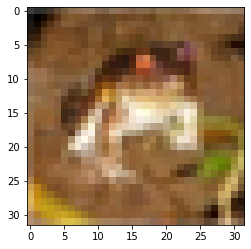

Label of Image: [6]


In [11]:
import matplotlib.pyplot as plt
import numpy as np

print('Size of Image: {}'.format(x_train[0].shape))

plt.imshow(x_train[0])
plt.show()

print('Label of Image: {}'.format(y_train[0]))

# ***Building CNN Architechture***

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

input_shape = x_train[0].shape
n_classes = 10

def create_model():
  model = Sequential()
  # CNN
  model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=input_shape))
  model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(rate=0.25))

  model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
  model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(rate=0.25))

  model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
  model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(rate=0.25))

  # Fully Connected Layers
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(rate=0.5))
  model.add(Dense(n_classes, activation='softmax'))
  
  return model

In [16]:
model = create_model()

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)         

In [18]:
# convert the y_train and y_test labels in categorical_one_hot encodings
from keras.utils.np_utils import to_categorical

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [19]:
batch_size = 256
epochs = 50

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train_one_hot, batch_size=batch_size, epochs=epochs, validation_split=0.25)

Epoch 1/50
147/147 [==============================] - 164s 1s/step - loss: 3.3870 - accuracy: 0.1371 - val_loss: 1.8663 - val_accuracy: 0.3054
Epoch 2/50
147/147 [==============================] - 164s 1s/step - loss: 1.8928 - accuracy: 0.3173 - val_loss: 2.3815 - val_accuracy: 0.2779
Epoch 3/50
147/147 [==============================] - 164s 1s/step - loss: 1.7168 - accuracy: 0.3933 - val_loss: 1.4840 - val_accuracy: 0.4834
Epoch 4/50
147/147 [==============================] - 165s 1s/step - loss: 1.5022 - accuracy: 0.4668 - val_loss: 1.4642 - val_accuracy: 0.4814
Epoch 5/50
147/147 [==============================] - 165s 1s/step - loss: 1.4126 - accuracy: 0.4993 - val_loss: 1.3091 - val_accuracy: 0.5482
Epoch 6/50
147/147 [==============================] - 165s 1s/step - loss: 1.3283 - accuracy: 0.5240 - val_loss: 1.2460 - val_accuracy: 0.5534
Epoch 7/50
147/147 [==============================] - 165s 1s/step - loss: 1.2363 - accuracy: 0.5568 - val_loss: 1.2115 - val_accuracy: 0.5773

# ***Plot Loss Curve***

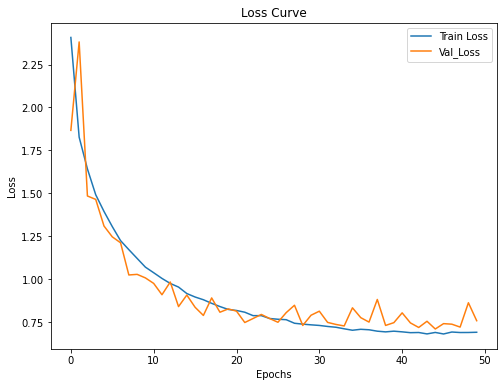

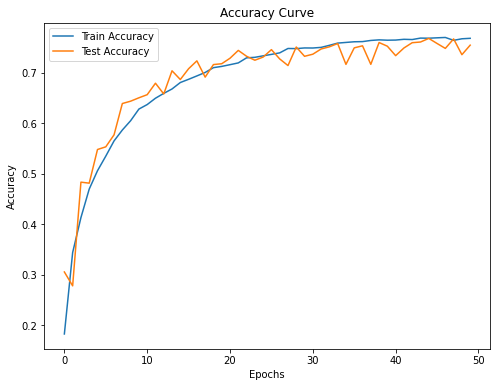

In [20]:
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()

In [21]:
model.evaluate(x_test, y_test_one_hot, batch_size)

40/40 [==============================] - 10s 239ms/step - loss: 0.7605 - accuracy: 0.7552


[0.760505199432373, 0.7552000284194946]

# ***Using Data Augmentation***



1.   One of the major reasons for overfitting is that you don’t have enough data to train your network. Apart from regularization, another very effective way to counter Overfitting is Data Augmentation

2.   Artificially creating more images from the images you already have by changing the size, orientation etc of the image



In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model1 = create_model()
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# define transformation on Training Data
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

history1 = model1.fit(datagen.flow(x_train, y_train_one_hot, batch_size), steps_per_epoch=int(np.ceil(x_train.shape[0]/float(batch_size))), epochs=epochs, 
                      validation_data=(x_test, y_test_one_hot))


Epoch 1/50
196/196 [==============================] - 237s 1s/step - loss: 3.3384 - accuracy: 0.1320 - val_loss: 1.9062 - val_accuracy: 0.2844
Epoch 2/50
196/196 [==============================] - 237s 1s/step - loss: 1.9586 - accuracy: 0.2915 - val_loss: 1.6101 - val_accuracy: 0.4185
Epoch 3/50
196/196 [==============================] - 236s 1s/step - loss: 1.7050 - accuracy: 0.3857 - val_loss: 1.5215 - val_accuracy: 0.4504
Epoch 4/50
196/196 [==============================] - 236s 1s/step - loss: 1.5485 - accuracy: 0.4447 - val_loss: 1.4075 - val_accuracy: 0.4936
Epoch 5/50
196/196 [==============================] - 236s 1s/step - loss: 1.4539 - accuracy: 0.4821 - val_loss: 1.2989 - val_accuracy: 0.5358
Epoch 6/50
196/196 [==============================] - 236s 1s/step - loss: 1.3845 - accuracy: 0.5080 - val_loss: 1.3601 - val_accuracy: 0.5211
Epoch 7/50
196/196 [==============================] - 235s 1s/step - loss: 1.3066 - accuracy: 0.5408 - val_loss: 1.1292 - val_accuracy: 0.5991

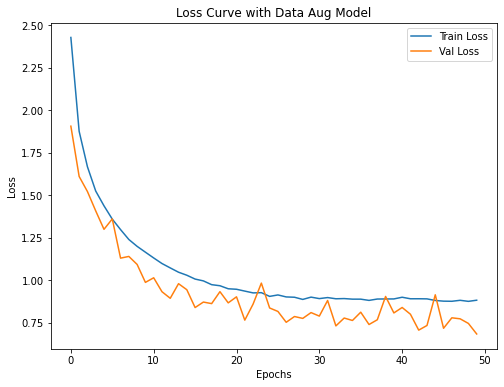

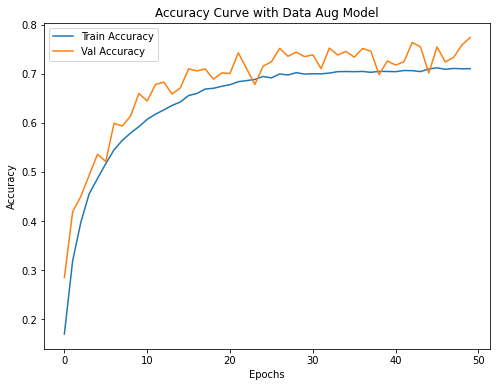

In [27]:
# Loss Plot for Data Aug Model
plt.figure(figsize=(8,6))
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve with Data Aug Model')
plt.legend()
plt.show()

# Accuracy Plot for Data Aug Model
plt.figure(figsize=(8,6))
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve with Data Aug Model')
plt.legend()
plt.show()